# Creating a CNN

### Import Libraries

In [3]:
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

### Prepare the Dataset

We will be making use of the *Cifar-10* dataset, which consists of 32x32 pixel images.

Divide the dataset into training and testing sets. Normalise the data into the range (0, 1) by dividing with the highest pixel value (255.0), then convert to vectors.

In [4]:
(trainimage, trainlabel), (testimage, testlabel) = cifar10.load_data()
trainimage, testimage=trainimage/255.0, testimage/255.0
trainlabelarray=to_categorical(trainlabel, 10)
testlabelarray=to_categorical(testlabel, 10)
classnames=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### Create a Model

Create a model by stacking Conv2D layers. Note that we use a pooling layer after each conv2D layer, wg=hich eill help to reduce the dimentions of the feature map provided by the Conv2D layer. 

`Dropout` is a regularisation technique. in dropout, a number of neurons are randomly dropped from the layer, and do not take part in processing activities. this is done to improve generalisation and reduce the dependency of the model of a few neurons.

A `Flatten` layer is also included, before the data is fed into the dense layers. The `Flatten` layer is used to reduce the data to one dimension so that it may be fed into the dense layer for further processing.



In [5]:
def createModel():
  # input layer
  input=Input(shape=(32, 32, 3), name='input')
  # first convolutional layer
  conv1=Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), name='conv1')(input)
  # max pooling layer
  pool1=MaxPooling2D(2, 2)(conv1)
  # dropout layer
  drop1=Dropout(0.5)(pool1)

  # second convolutional layer
  conv2=Conv2D(64, (3, 3), activation='relu', name='conv2')(drop1)
  pool2=MaxPooling2D(2, 2)(conv2)
  drop2=Dropout(0.5)(pool2)

  # third convolutional layer
  conv3=Conv2D(128, (3, 3), activation='relu', name='conv3')(drop2)

  # flatten layer
  flat=Flatten()(conv3)

  # dense layer
  dense1=Dense(128, activation='relu', name='dense1')(flat)
  output=Dense(10, activation='softmax', name='output')(dense1)
  model=Model(inputs=input, outputs=output)
  return model

### Compile the Model

In [6]:
model=createModel()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\nagan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train the Model

Add the early stopping callback and train the model on the data.

In [7]:
earlystopping=EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history=model.fit(trainimage, trainlabelarray, epochs=100, shuffle=True, validation_split=0.2, callbacks=[earlystopping])

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.2921 - loss: 1.8847 - val_accuracy: 0.5091 - val_loss: 1.3868
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.4940 - loss: 1.4023 - val_accuracy: 0.5366 - val_loss: 1.3289
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.5488 - loss: 1.2576 - val_accuracy: 0.5549 - val_loss: 1.2576
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5830 - loss: 1.1812 - val_accuracy: 0.5733 - val_loss: 1.1687
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.5995 - loss: 1.1259 - val_accuracy: 0.6275 - val_loss: 1.0486
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.6197 - loss: 1.0641 - val_accuracy: 0.6408 - val_loss: 1.0184
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.6309 - loss: 1.0362 - val_accuracy: 0.6008 - val_loss: 1.1493
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 

Here we see that due to the action of early stopping, the training has stopped at 33 epochs instead of completing all 100.

### Test the Model

In [8]:
def testModel(model, x, y):
  ypred=model.predict(x)
  ypred=np.argmax(ypred, axis=1)
  print("confusion matrix\n", confusion_matrix(y, ypred))
  print("classification report\n", classification_report(y, ypred))


In [9]:
testModel(model, testimage, testlabel)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
confusion matrix
 [[731  15  51  20  23   7  10   7 102  34]
 [ 16 813  10  13   7   8  23   6  31  73]
 [ 62   4 572  85 108  50  69  24  20   6]
 [ 17   5  68 541  89 152  80  28  11   9]
 [ 19   1  57  56 719  23  53  56  11   5]
 [  7   2  49 193  58 595  36  48  11   1]
 [  2   1  36  54  43  14 835   5   7   3]
 [ 10   1  28  48  88  55  15 740   4  11]
 [ 49  23  12  13  13   4   8   5 858  15]
 [ 29  79   9  24  11  10  20  14  35 769]]
classification report
               precision    recall  f1-score   support

           0       0.78      0.73      0.75      1000
           1       0.86      0.81      0.84      1000
           2       0.64      0.57      0.60      1000
           3       0.52      0.54      0.53      1000
           4       0.62      0.72      0.67      1000
           5       0.65      0.59      0.62      1000
           6       0.73      0.83      0.78      1000
           7       0.79      0.74      0.77      1000


In [10]:
def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend()
    plt.show()

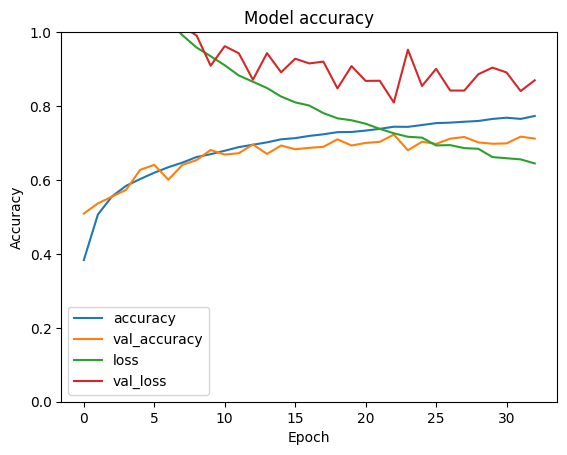

In [11]:
plot_history(history)

### Sources

+ [Infosys Springboard](https://infyspringboard.onwingspan.com/web/en/viewer/video/lex_auth_01329472454671564827503_shared?collectionId=lex_auth_01329472278937600027536_shared&collectionType=Course&pathId=lex_auth_01329472325597593627505_shared)
+ [geeksforgeeks.org](https://www.geeksforgeeks.org/what-is-a-neural-network-flatten-layer/)